<a href="https://colab.research.google.com/github/KrishKamble7/Blinkit_Grocery/blob/main/Blinkit_Grocery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Data/BlinkIT Grocery Data.xlsx')

Data Cleaning

In [ ]:
df.head()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2016,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2014,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0


In [ ]:
df.tail()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
8518,low fat,NCT53,Health and Hygiene,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,NaN,164.5526,4.0
8519,low fat,FDN09,Snack Foods,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.034706,NaN,241.6828,4.0
8520,low fat,DRE13,Soft Drinks,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.027571,NaN,86.6198,4.0
8521,reg,FDT50,Dairy,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.107715,NaN,97.8752,4.0
8522,reg,FDM58,Snack Foods,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,NaN,112.2544,4.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item Fat Content           8523 non-null   object 
 1   Item Identifier            8523 non-null   object 
 2   Item Type                  8523 non-null   object 
 3   Outlet Establishment Year  8523 non-null   int64  
 4   Outlet Identifier          8523 non-null   object 
 5   Outlet Location Type       8523 non-null   object 
 6   Outlet Size                8523 non-null   object 
 7   Outlet Type                8523 non-null   object 
 8   Item Visibility            8523 non-null   float64
 9   Item Weight                7060 non-null   float64
 10  Sales                      8523 non-null   float64
 11  Rating                     8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
df.describe()

,Outlet Establishment Year,Item Visibility,Item Weight,Sales,Rating
count,8523.000000,8523.000000,7060.000000,8523.000000,8523.000000
mean,2016.450546,0.066132,12.857645,140.992783,3.965857
std,3.189396,0.051598,4.643456,62.275067,0.605651
min,2011.000000,0.000000,4.555000,31.290000,1.000000
25%,2014.000000,0.026989,8.773750,93.826500,4.000000
50%,2016.000000,0.053931,12.600000,143.012800,4.000000
75%,2018.000000,0.094585,16.850000,185.643700,4.200000
max,2022.000000,0.328391,21.350000,266.888400,5.000000


In [ ]:
df.isnull().sum()

,0
Item Fat Content,0
Item Identifier,0
Item Type,0
Outlet Establishment Year,0
Outlet Identifier,0
Outlet Location Type,0
Outlet Size,0
Outlet Type,0
Item Visibility,0
Item Weight,1463


In [ ]:
df.dropna()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2016,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2014,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8241,reg,FDH26,Canned,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.034841,19.25,141.1496,4.0
8242,reg,FDG56,Fruits and Vegetables,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.071744,13.30,59.7536,4.0
8243,reg,FDM15,Meat,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.057655,11.80,152.6366,4.0
8244,reg,FDX57,Snack Foods,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.047459,17.25,95.8068,4.0


In [ ]:
df.isnull().sum()

,0
Item Fat Content,0
Item Identifier,0
Item Type,0
Outlet Establishment Year,0
Outlet Identifier,0
Outlet Location Type,0
Outlet Size,0
Outlet Type,0
Item Visibility,0
Item Weight,1463


In [ ]:
df = df.dropna(subset=['Item Weight'])

In [ ]:
df.isnull().sum()

,0
Item Fat Content,0
Item Identifier,0
Item Type,0
Outlet Establishment Year,0
Outlet Identifier,0
Outlet Location Type,0
Outlet Size,0
Outlet Type,0
Item Visibility,0
Item Weight,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.dtypes

,0
Item Fat Content,object
Item Identifier,object
Item Type,object
Outlet Establishment Year,int64
Outlet Identifier,object
Outlet Location Type,object
Outlet Size,object
Outlet Type,object
Item Visibility,float64
Item Weight,float64


In [ ]:
df.corr

<bound method DataFrame.corr of      Item Fat Content Item Identifier              Item Type  \
0             Regular           FDX32  Fruits and Vegetables   
1             Low Fat           NCB42     Health and Hygiene   
2             Regular           FDR28           Frozen Foods   
3             Regular           FDL50                 Canned   
4             Low Fat           DRI25            Soft Drinks   
...               ...             ...                    ...   
8241              reg           FDH26                 Canned   
8242              reg           FDG56  Fruits and Vegetables   
8243              reg           FDM15                   Meat   
8244              reg           FDX57            Snack Foods   
8245              reg           FDD10            Snack Foods   

      Outlet Establishment Year Outlet Identifier Outlet Location Type  \
0                          2012            OUT049               Tier 1   
1                          2022            OUT018               Tier 3   
2                          2016            OUT046               Tier 1   
3                          2014            OUT013               Tier 3   
4                          2015            OUT045               Tier 2   
...                         ...               ...                  ...   
8241                       2022            OUT018               Tier 3   
8242                       2022            OUT018               Tier 3   
8243                       2022            OUT018               Tier 3   
8244                       2022            OUT018               Tier 3   
8245                       2022            OUT018               Tier 3   

     Outlet Size        Outlet Type  Item Visibility  Item Weight     Sales  \
0         Medium  Supermarket Type1         0.100014        15.10  145.4786   
1         Medium  Supermarket Type2         0.008596        11.80  115.3492   
2          Small  Supermarket Type1         0.025896        13.85  165.0210   
3           High  Supermarket Type1         0.042278        12.15  126.5046   
4          Small  Supermarket Type1         0.033970        19.60   55.1614   
...          ...                ...              ...          ...       ...   
8241      Medium  Supermarket Type2         0.034841        19.25  141.1496   
8242      Medium  Supermarket Type2         0.071744        13.30   59.7536   
8243      Medium  Supermarket Type2         0.057655        11.80  152.6366   
8244      Medium  Supermarket Type2         0.047459        17.25   95.8068   
8245      Medium  Supermarket Type2         0.046208        20.60  178.0344   

      Rating  
0        5.0  
1        5.0  
2        5.0  
3        5.0  
4        5.0  
...      ...  
8241     4.0  
8242     4.0  
8243     4.0  
8244     4.0  
8245     4.0  

[7060 rows x 12 columns]>

In [ ]:
df.shape

(7060, 12)

In [ ]:
df.columns

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')

**Data Visualization**

Sales Distribution

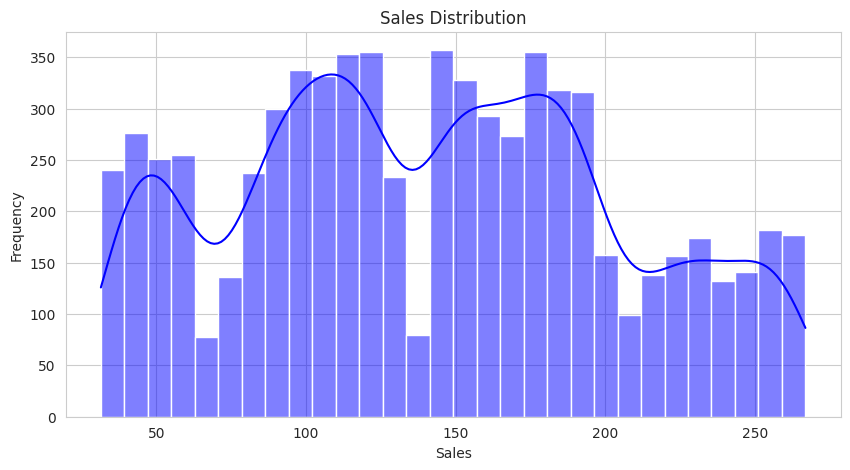

In [ ]:
sns.set_style("whitegrid")

plt.figure(figsize=(10, 5))
sns.histplot(df['Sales'], bins=30, kde=True, color='blue')
plt.title('Sales Distribution')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

2. Sales by Item Type

<ipython-input-19-cd73e752f8fe>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Sales', y='Item Type', data=df, ci=None, palette='viridis')
<ipython-input-19-cd73e752f8fe>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sales', y='Item Type', data=df, ci=None, palette='viridis')


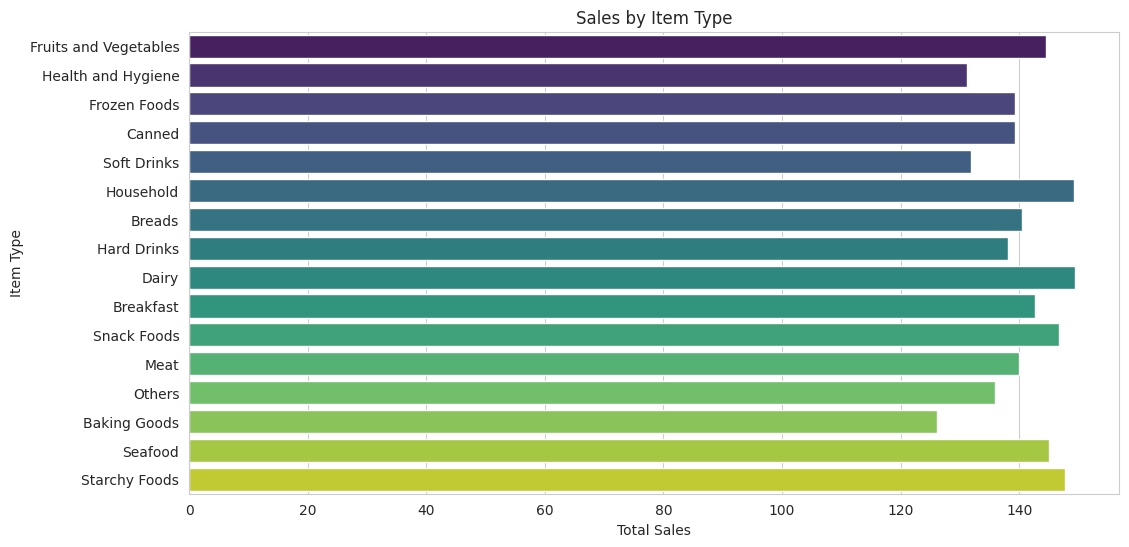

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Sales', y='Item Type', data=df, ci=None, palette='viridis')
plt.title('Sales by Item Type')
plt.xlabel('Total Sales')
plt.ylabel('Item Type')
plt.show()

3. Outlet-wise Sales Comparison

<ipython-input-20-775d97fc901b>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Outlet Identifier', y='Sales', data=df, ci=None, palette='coolwarm')
<ipython-input-20-775d97fc901b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Outlet Identifier', y='Sales', data=df, ci=None, palette='coolwarm')


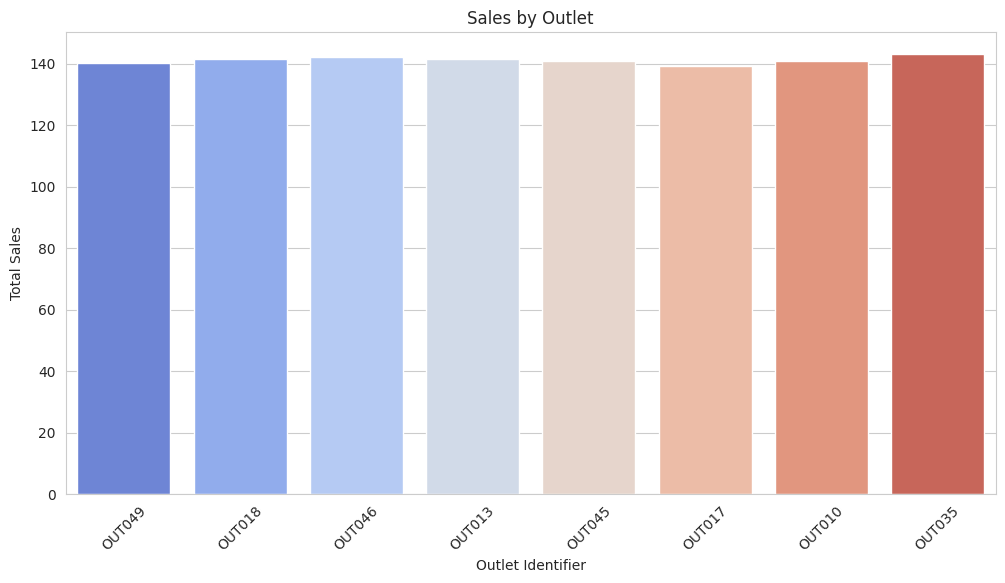

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Outlet Identifier', y='Sales', data=df, ci=None, palette='coolwarm')
plt.title('Sales by Outlet')
plt.xlabel('Outlet Identifier')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

4. Boxplot of Sales by Item Type

<ipython-input-21-823084220421>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Sales', y='Item Type', data=df, palette='Set2')


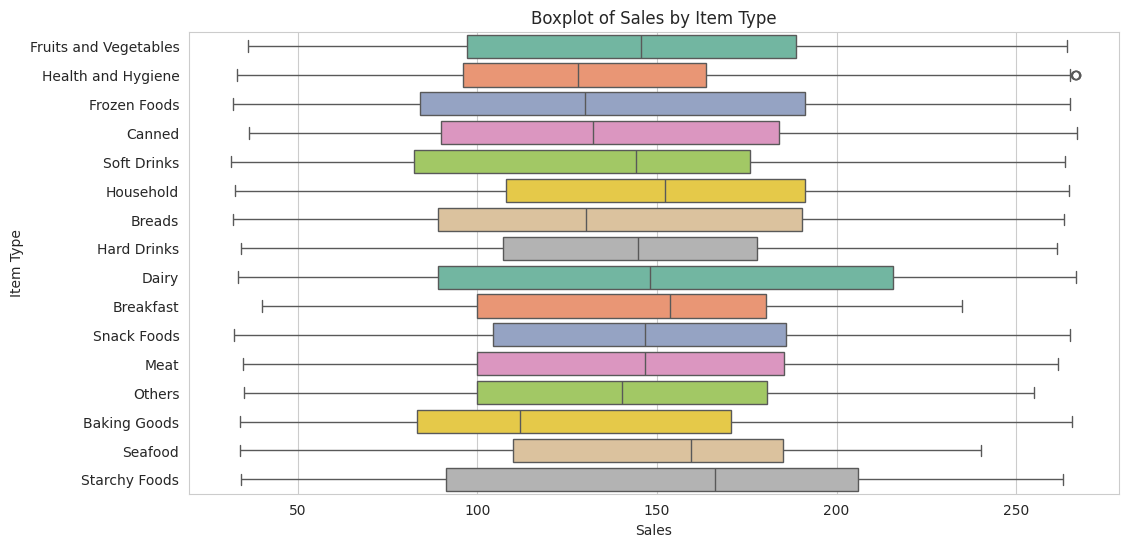

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Sales', y='Item Type', data=df, palette='Set2')
plt.title('Boxplot of Sales by Item Type')
plt.show()

5. Sales Distribution by Outlet Type

<ipython-input-22-e37369caa1f1>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outlet Type', y='Sales', data=df, palette='coolwarm')


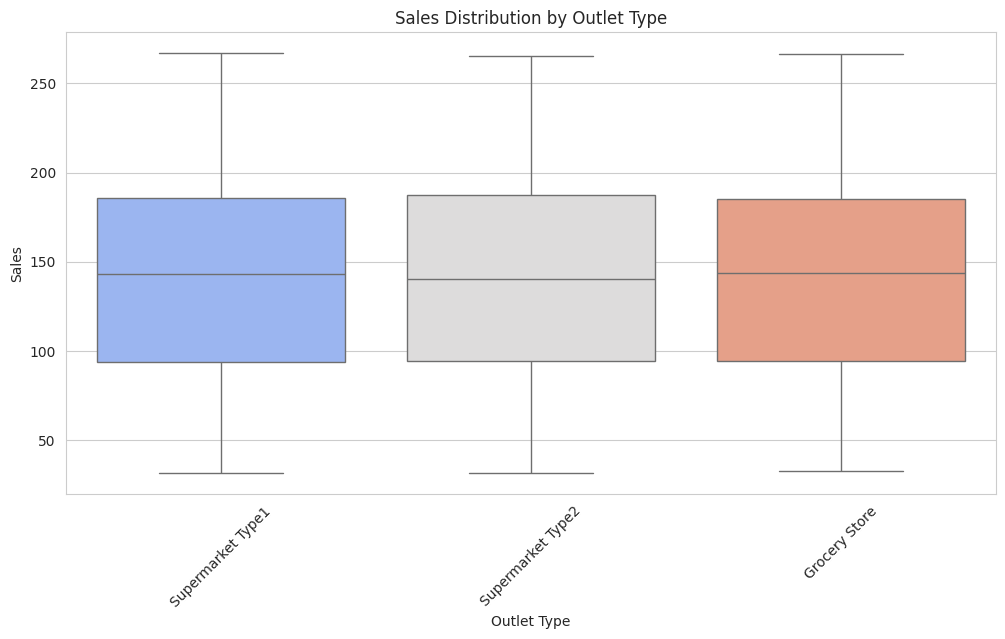

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Outlet Type', y='Sales', data=df, palette='coolwarm')
plt.title('Sales Distribution by Outlet Type')
plt.xticks(rotation=45)
plt.show()

6. Sales Trend by Establishment Year

<ipython-input-23-3d0077b5ce62>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Outlet Establishment Year', y='Sales', data=df, ci=None, marker='o', color='purple')


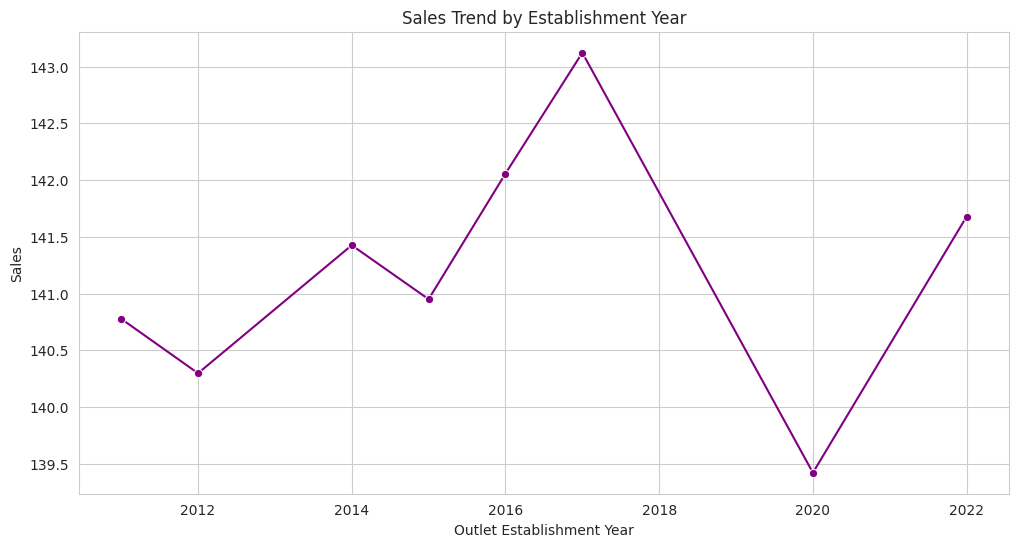

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Outlet Establishment Year', y='Sales', data=df, ci=None, marker='o', color='purple')
plt.title('Sales Trend by Establishment Year')
plt.show()

7. Count Plot of Outlet Location Type

<ipython-input-24-cf00581f5b66>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outlet Location Type', data=df, palette='pastel')


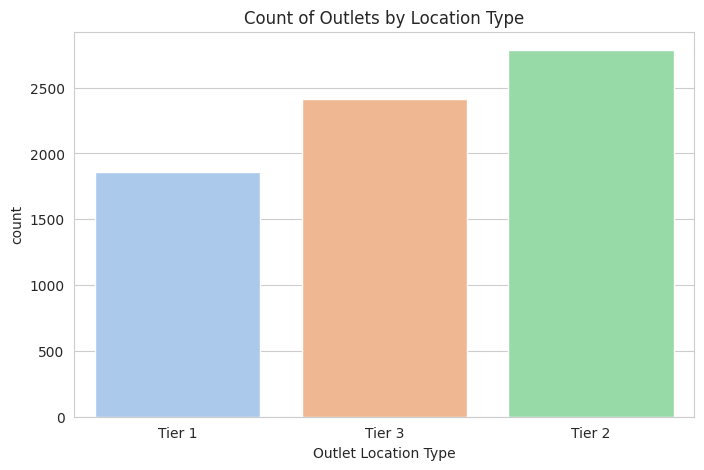

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Outlet Location Type', data=df, palette='pastel')
plt.title('Count of Outlets by Location Type')
plt.show()

8. Item Fat Content Distribution

<ipython-input-25-89f1f59d5a5a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Item Fat Content', data=df, palette='muted')


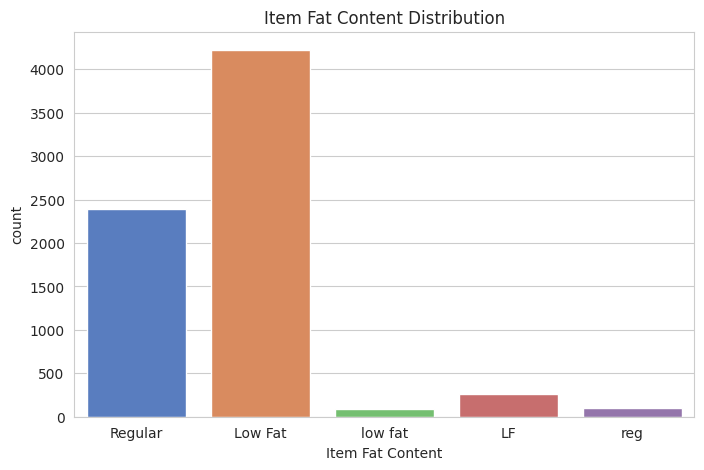

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Item Fat Content', data=df, palette='muted')
plt.title('Item Fat Content Distribution')
plt.show()

9. Scatter Plot of Item Weight vs Sales

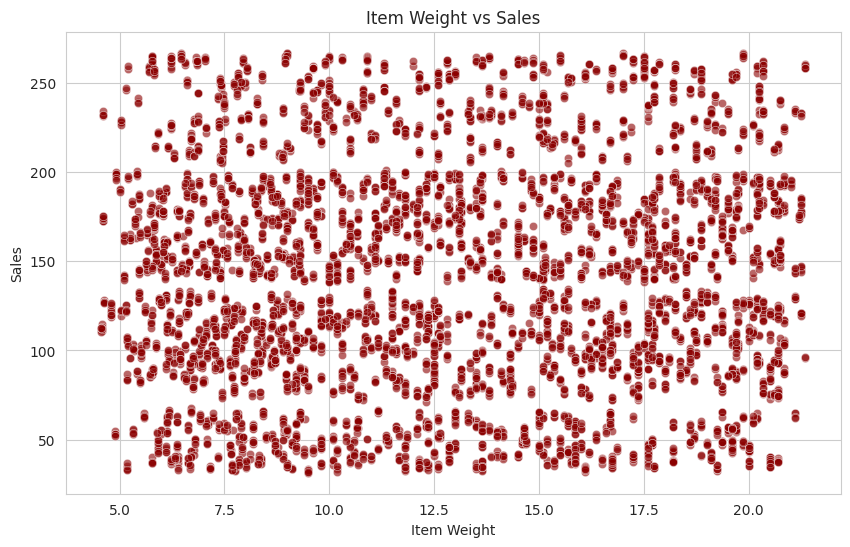

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Item Weight', y='Sales', data=df, alpha=0.6, color='darkred')
plt.title('Item Weight vs Sales')
plt.xlabel('Item Weight')
plt.ylabel('Sales')
plt.show()

10. Pairplot of Numerical Features

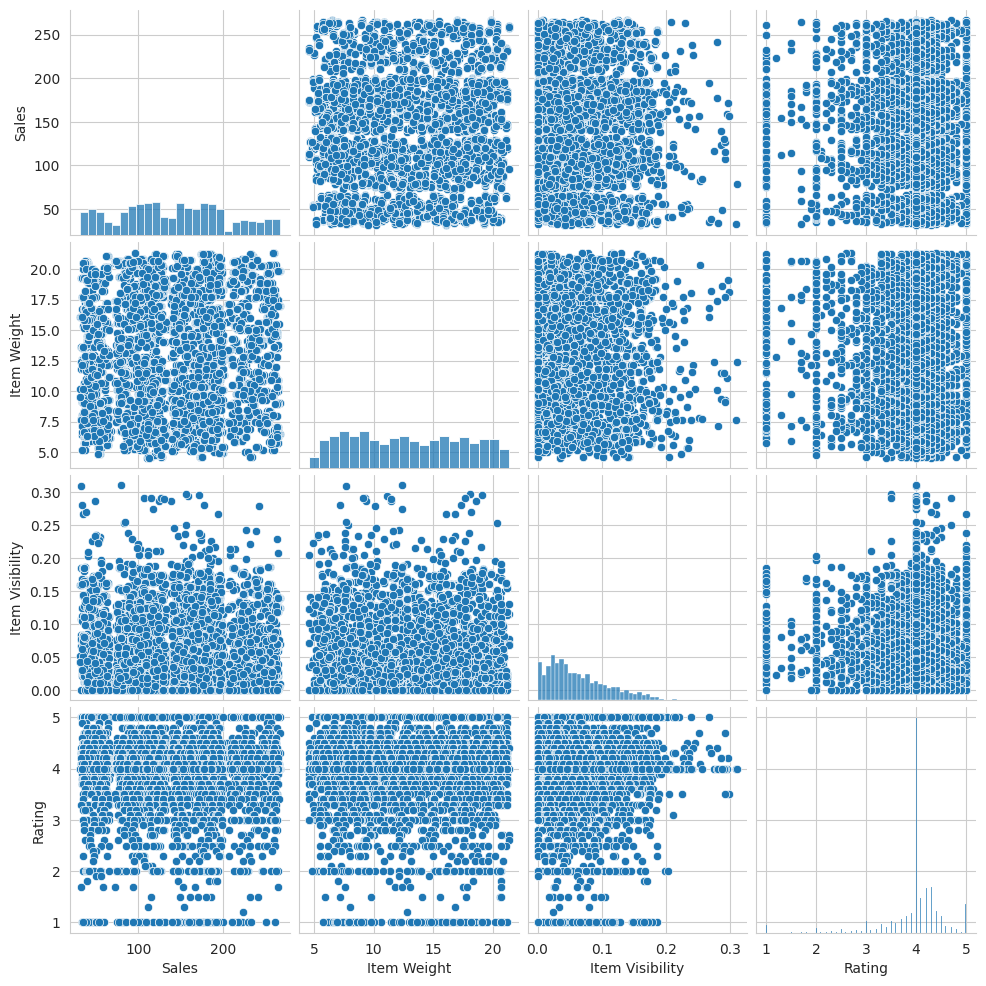

In [ ]:
sns.pairplot(df[['Sales', 'Item Weight', 'Item Visibility', 'Rating']])
plt.show()

11. Swarm Plot of Sales by Outlet Type

<ipython-input-28-60b23eaf01bc>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x='Outlet Type', y='Sales', data=df, palette='husl')
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 49.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 61.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


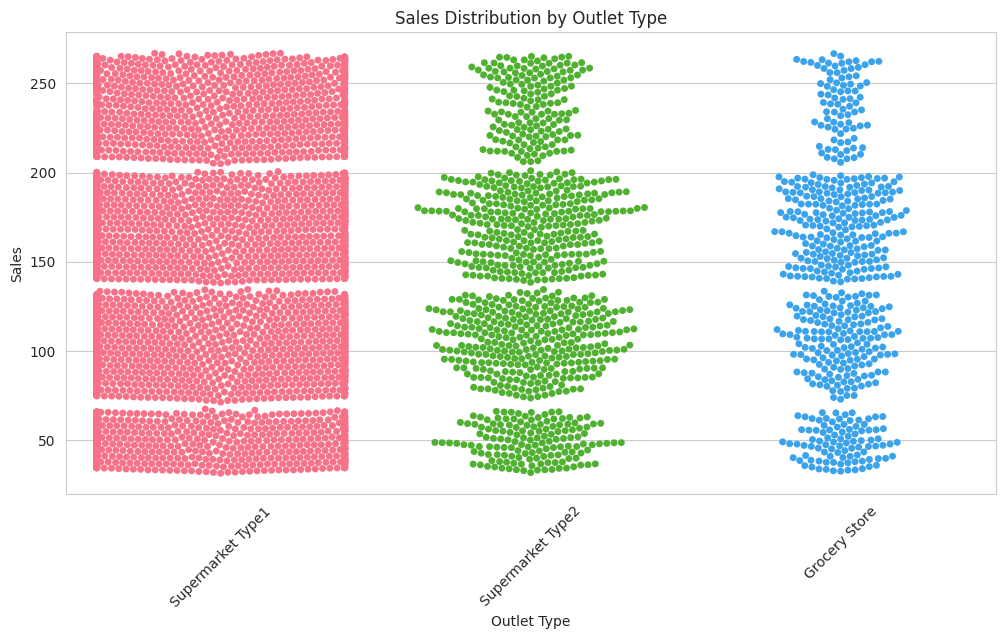

In [ ]:
plt.figure(figsize=(12, 6))
sns.swarmplot(x='Outlet Type', y='Sales', data=df, palette='husl')
plt.title('Sales Distribution by Outlet Type')
plt.xticks(rotation=45)
plt.show()

12.Violin Plot of Sales by Outlet Size

<ipython-input-29-c82994f75608>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Outlet Size', y='Sales', data=df, palette='cool')


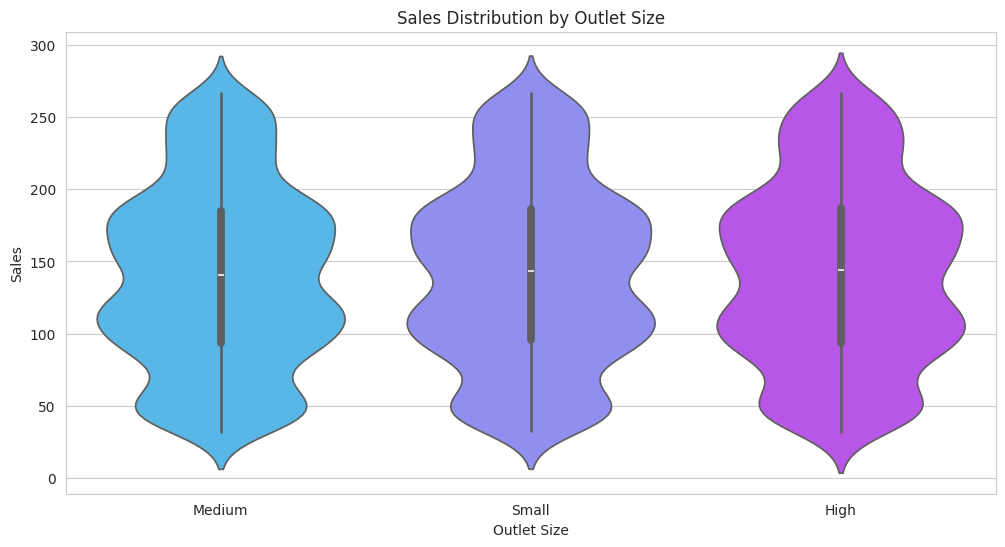

In [ ]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='Outlet Size', y='Sales', data=df, palette='cool')
plt.title('Sales Distribution by Outlet Size')
plt.show()

13. Regression Plot of Item Visibility vs Sales

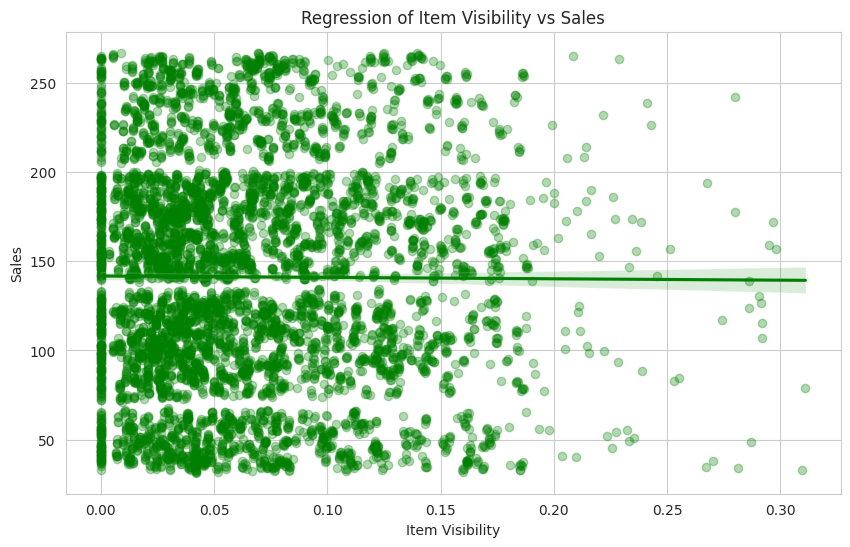

In [ ]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Item Visibility', y='Sales', data=df, scatter_kws={'alpha':0.3}, color='green')
plt.title('Regression of Item Visibility vs Sales')
plt.show()

14.  Line Plot: Sales Over Establishment Year by Outlet Type

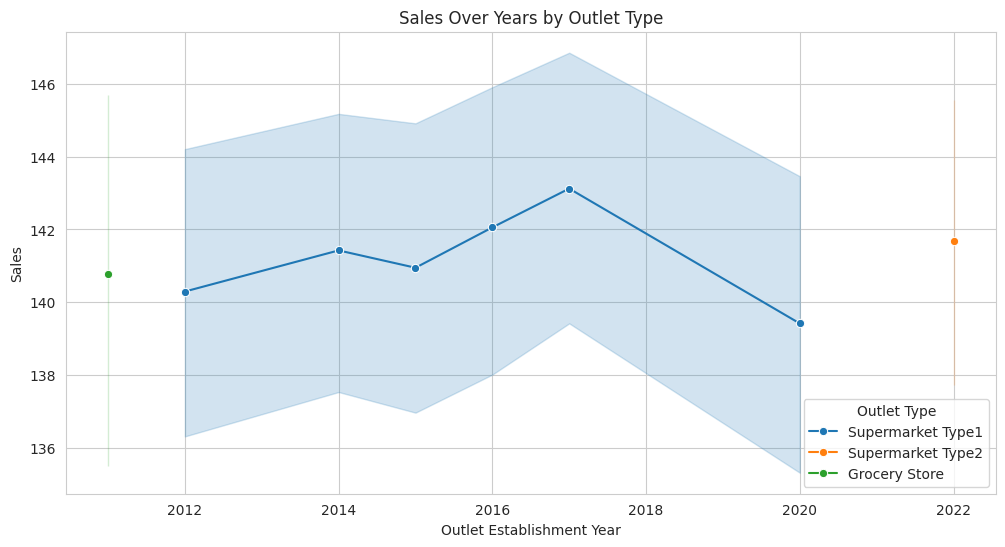

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Outlet Establishment Year', y='Sales', hue='Outlet Type', data=df, marker='o')
plt.title('Sales Over Years by Outlet Type')
plt.show()

15. Line Plot: Average Sales Per Year

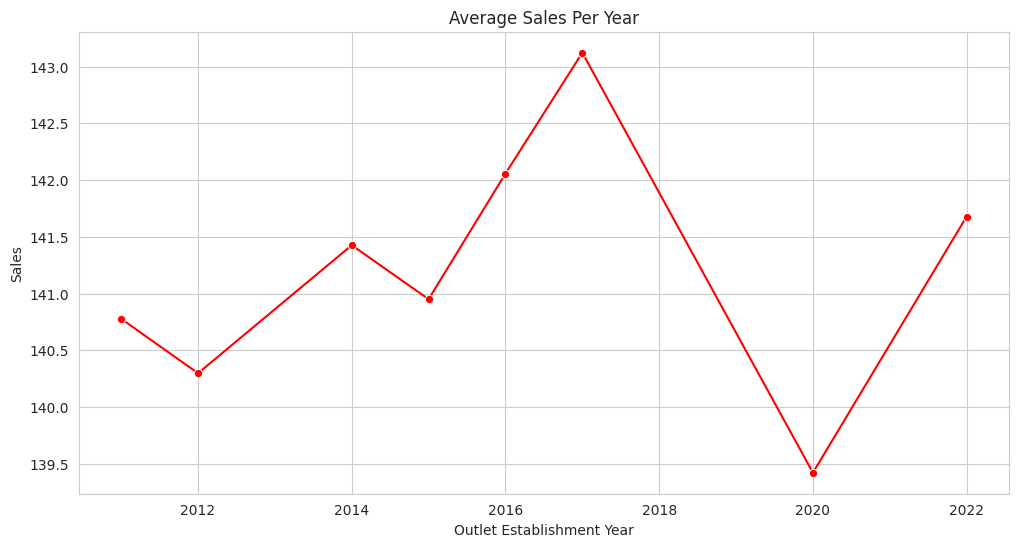

In [ ]:
plt.figure(figsize=(12, 6))
df_grouped = df.groupby('Outlet Establishment Year')['Sales'].mean().reset_index()
sns.lineplot(x='Outlet Establishment Year', y='Sales', data=df_grouped, marker='o', color='red')
plt.title('Average Sales Per Year')
plt.show()

# 17. Line Plot: Sales Trend by Item Type

<ipython-input-33-d95b10497ecf>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Outlet Establishment Year', y='Sales', hue='Item Type', data=df, marker='o', ci=None)


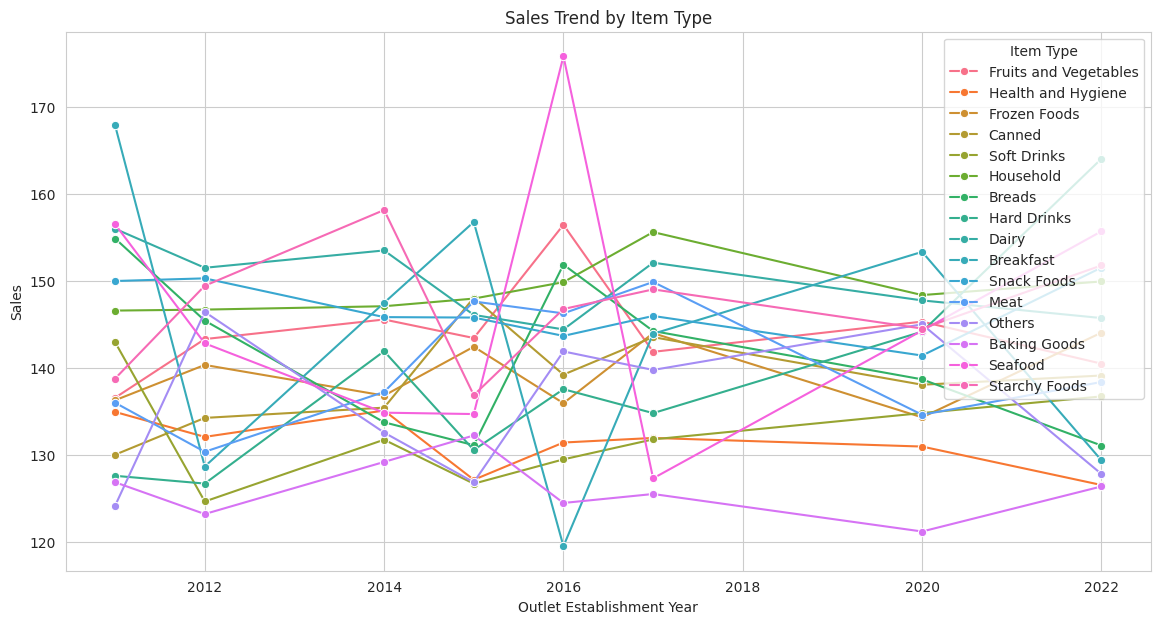

In [ ]:
plt.figure(figsize=(14, 7))
sns.lineplot(x='Outlet Establishment Year', y='Sales', hue='Item Type', data=df, marker='o', ci=None)
plt.title('Sales Trend by Item Type')
plt.show()

# 18. Additional Bar Chart: Sales by Outlet Size

<ipython-input-34-cdf24d9bfb66>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Outlet Size', y='Sales', data=df, ci=None, palette='Blues')
<ipython-input-34-cdf24d9bfb66>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Outlet Size', y='Sales', data=df, ci=None, palette='Blues')


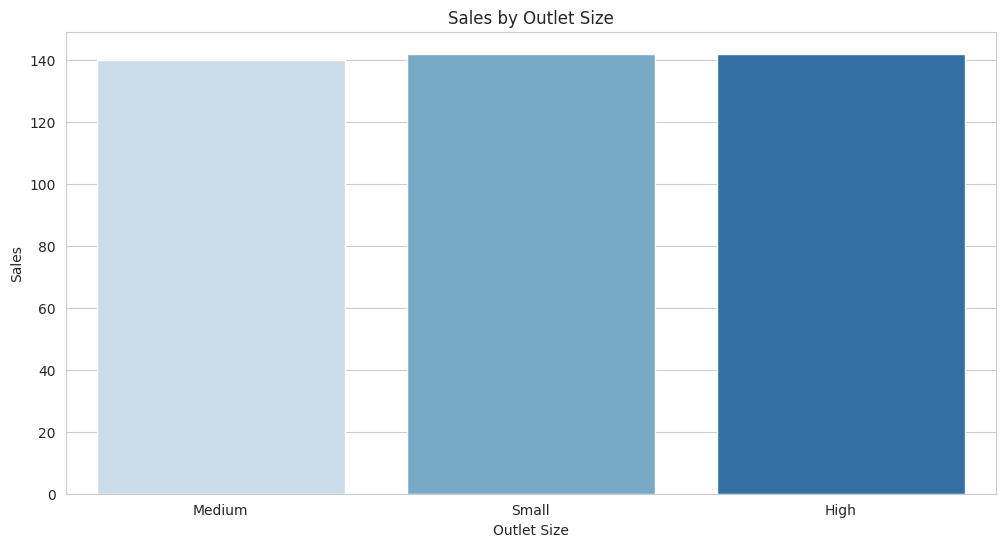

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Outlet Size', y='Sales', data=df, ci=None, palette='Blues')
plt.title('Sales by Outlet Size')
plt.xlabel('Outlet Size')
plt.ylabel('Sales')
plt.show()

# 19. Additional Bar Chart: Sales by Item Fat Content


<ipython-input-35-056e5fa7da88>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Item Fat Content', y='Sales', data=df, ci=None, palette='Greens')
<ipython-input-35-056e5fa7da88>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Item Fat Content', y='Sales', data=df, ci=None, palette='Greens')


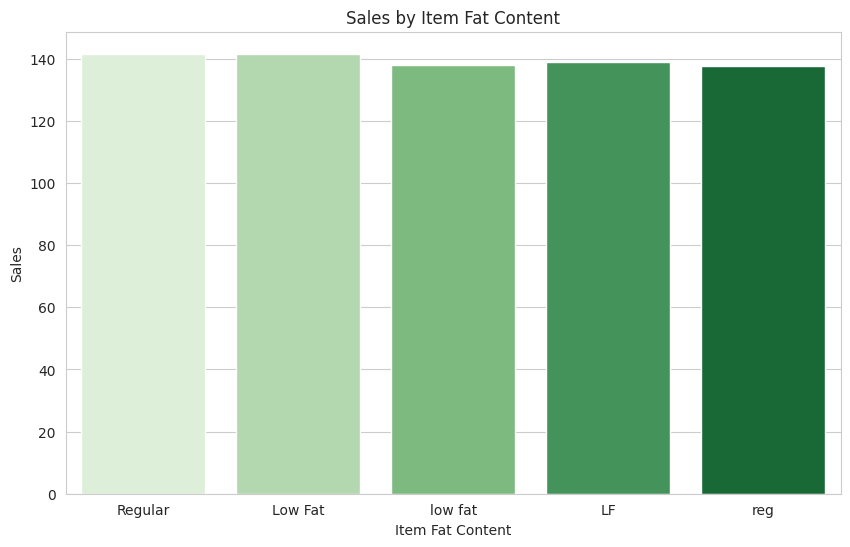

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Item Fat Content', y='Sales', data=df, ci=None, palette='Greens')
plt.title('Sales by Item Fat Content')
plt.xlabel('Item Fat Content')
plt.ylabel('Sales')
plt.show()

# 21. Additional Histogram: Item Weight Distribution


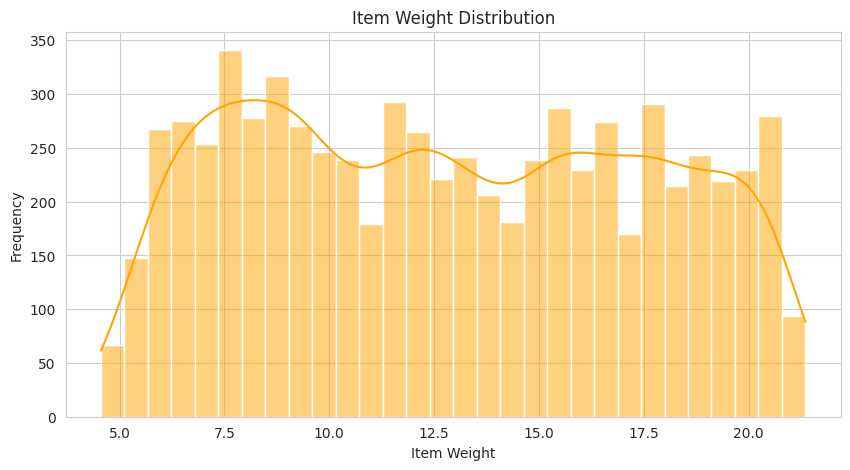

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Item Weight'], bins=30, kde=True, color='orange')
plt.title('Item Weight Distribution')
plt.xlabel('Item Weight')
plt.ylabel('Frequency')
plt.show()